In [1]:
# Import Libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

# 1. Exploratory Data Analysis 

1. Survival - Categorical (Target Variable)
0 = No, 1 = Yes

In [4]:
# 1. Survived - Categorical
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

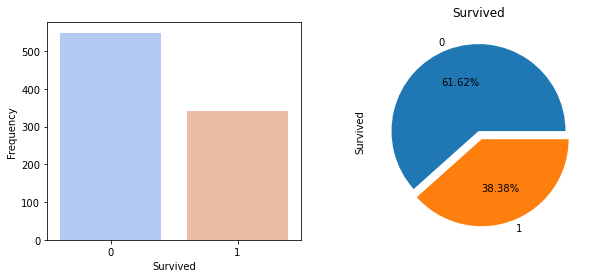

In [5]:
plt.rcParams['figure.figsize'] = (10,4)
fig,ax = plt.subplots(1,2)
sns.countplot(data.Survived , ax = ax[0], palette = 'coolwarm')
ax[0].set_xlabel('Survived')
ax[0].set_ylabel('Frequency')
plt.title(' Survived / Not Survived Ratio ')
data.Survived.value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct='%1.2f%%', ax = ax[1])
ax[1].set_title('Survived')


0 - Not Survived (549)
1 - Survived (342)
Clearly majority did not survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

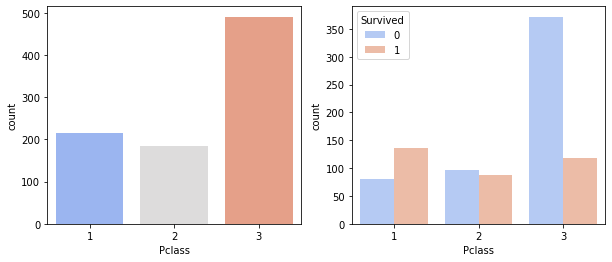

In [6]:
# 2. Pclass - Ordinal 
plt.rcParams['figure.figsize'] = (10,4)
fig, ax = plt.subplots(1,2)

sns.countplot(x = 'Pclass', data = data, ax = ax[0], palette = 'coolwarm')
sns.countplot(x = 'Pclass', data = data, hue = 'Survived', ax = ax[1], palette = 'coolwarm')

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Passenger from Class 1 have given high priority even though Class 3 had more passengers

Text(0.5, 1.0, 'Survival Ratio by Gender and Class')

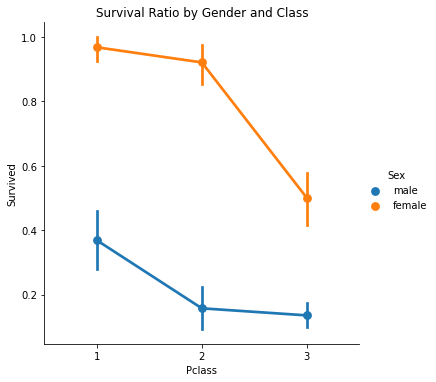

In [8]:
plt.rcParams['figure.figsize'] = (4,4)
sns.factorplot(x = 'Pclass', y  = 'Survived', data = data, hue = 'Sex')
plt.title('Survival Ratio by Gender and Class')

We can easily infer there that survival rate of Female in Class 1 is 94-96%, mens from Class 1 have survival rate of only around 40%. So it clearly evident gender plays important role 

3. Name of the Passenger

In [9]:
# 3. Name - Nominal
data['Name'].isnull().sum()

0

There is no null value in Name feature, it consist of salutation which can help us to get their age range for missing values

Text(0.5, 1.0, 'Survived / Not Survived by Gender')

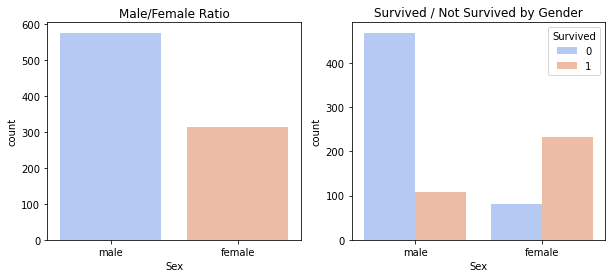

In [10]:
# 4. Gender - Nominal
plt.rcParams['figure.figsize'] = (10,4)
fig, ax = plt.subplots(1,2)

sns.countplot(x = data['Sex'], ax = ax[0], palette = 'coolwarm')
ax[0].set_title('Male/Female Ratio')
sns.countplot(x = 'Sex', hue = 'Survived', data = data, ax = ax[1], palette = 'coolwarm')
ax[1].set_title('Survived / Not Survived by Gender')

The number of Mens boarded in ship are move however, the survival rate for female is more than men.

5. Age - Continous Feature

Text(0.5, 1.0, 'Age Distribution')

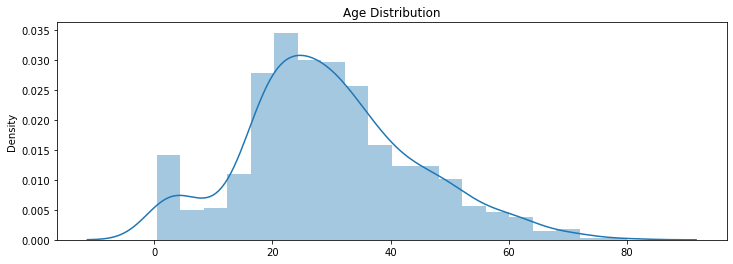

In [11]:
# 5. Age - Continous Feature
plt.rcParams['figure.figsize'] = (12,4)

sns.distplot(x = data['Age'], bins = 20)
plt.title('Age Distribution')


<AxesSubplot:xlabel='Sex', ylabel='Age'>

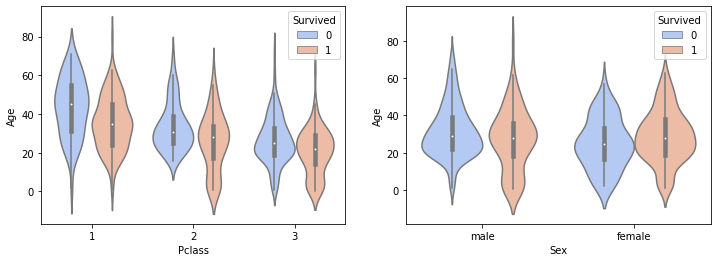

In [12]:
plt.subplot(121)
sns.violinplot(x = 'Pclass',y = 'Age', data = data, hue = 'Survived', palette = 'coolwarm')

plt.subplot(122)
sns.violinplot(x = 'Sex',y = 'Age', data = data, hue = 'Survived', palette = 'coolwarm')



1. Survival Rate is better for age 20 - 40
2. Survival Rate is better for Female
3. Survival Rate for kids is good regardless of the Class they belong too
4. Survival Rate is good for Class 1


([<matplotlib.axis.XTick at 0x2088e712d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

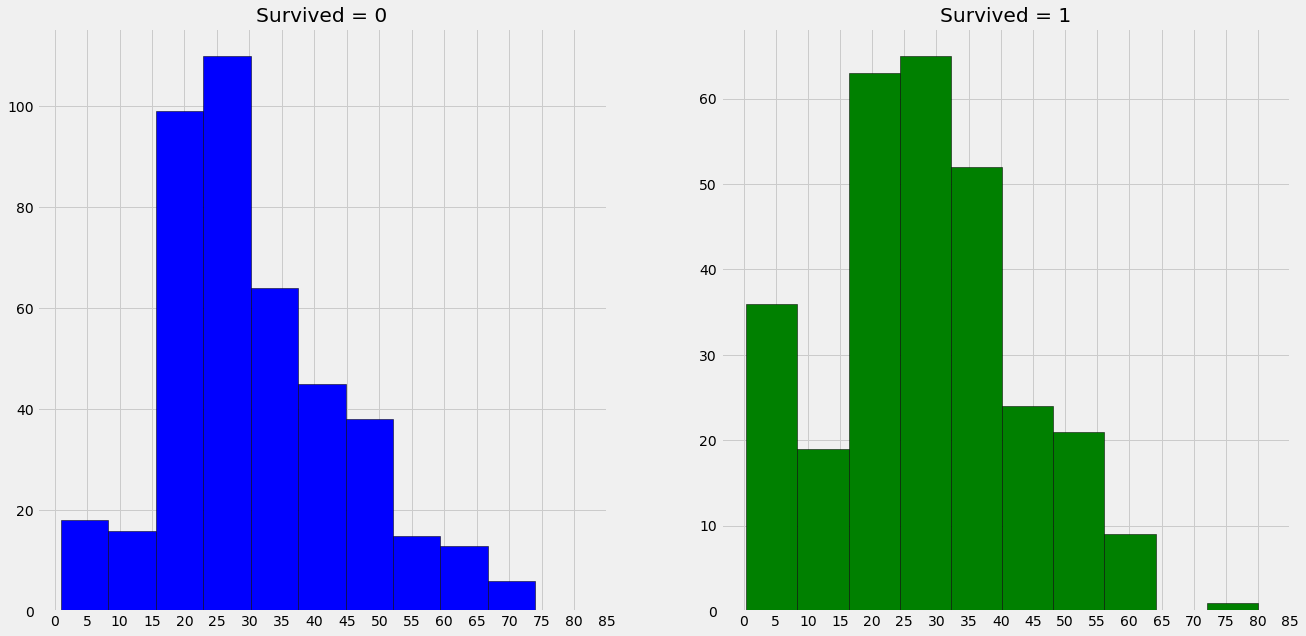

In [13]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')
bins = list(range(0, 90, 5)) 
plt.subplot(121)
plt.hist(data[data['Survived']== 0].Age, color = 'blue', edgecolor = 'black')
plt.title('Survived = 0')
plt.xticks(bins)
plt.subplot(122)
plt.hist(data[data['Survived']== 1].Age, color = 'green', edgecolor = 'black')
plt.title('Survived = 1')
plt.xticks(bins)

Sibsp: The dataset defines family relation
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Text(0.5, 1.0, 'Survival by SibSp')

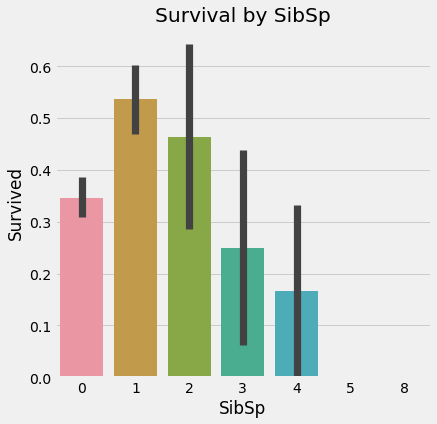

In [14]:
# 6. Sibsp
plt.rcParams['figure.figsize'] = (6,6)
sns.barplot(x = data['SibSp'], y = data['Survived'])
plt.title('Survival by SibSp')



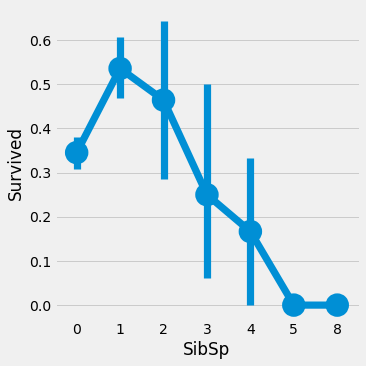

In [15]:
sns.factorplot(data['SibSp'], data['Survived'], data = data)

1. The survival rate is high when person either traveling alone or as a couple.
2. The survival rate decreases as the number of family member increases from 2,3,4
3. The Surivial rate for family member as 5 or 8 is almost none. Need to check if class has any association

In [16]:
pd.crosstab(data.Pclass, data.SibSp)

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


Here the SibSp 4, 5, 6 belong to Class 3 due to which survival rate is None in Class 5 & 8

7. Parch: The dataset defines family relations in this way...
Parent = Mother, Father
Child = Daughter, Son, Stepdaughter, Stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

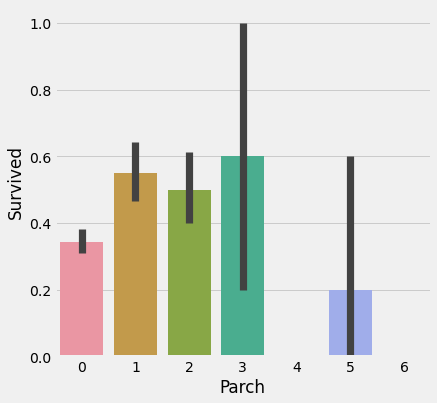

In [17]:
# 7. Parch - Discrete Variable
sns.barplot(x = data['Parch'], y = data['Survived'])

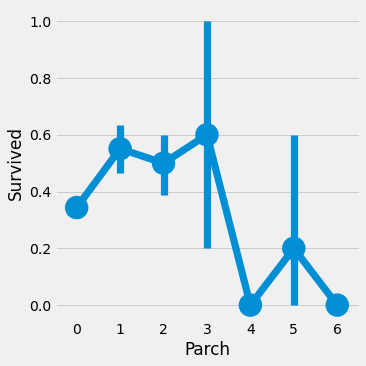

In [18]:
sns.factorplot(data['Parch'], data['Survived'], data = data)

1. Here the passenger with parents boarded count 3 has good survival rate
2. Best survival rate belong to parents between 1 - 3
3. Traveling alone also has low survival rate, and it decrease as the count goes from 4 to 6

Majority of death in range 20 - 30
Kids aging below 5 were saved in large numbers

8. Ticket - Nominal

In [19]:
# 8. Ticket

print('Null count', data['Ticket'].isnull().sum())
print('Distinct: ', data['Ticket'].nunique())
data['Ticket'].head()

Null count 0
Distinct:  681


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

There is no empty values for Ticket and have 681 unique tickets. Cannot be categorized, so we drop this feature

9. Fare - Passenger fare

Text(0.5, 1.0, 'Class - 3')

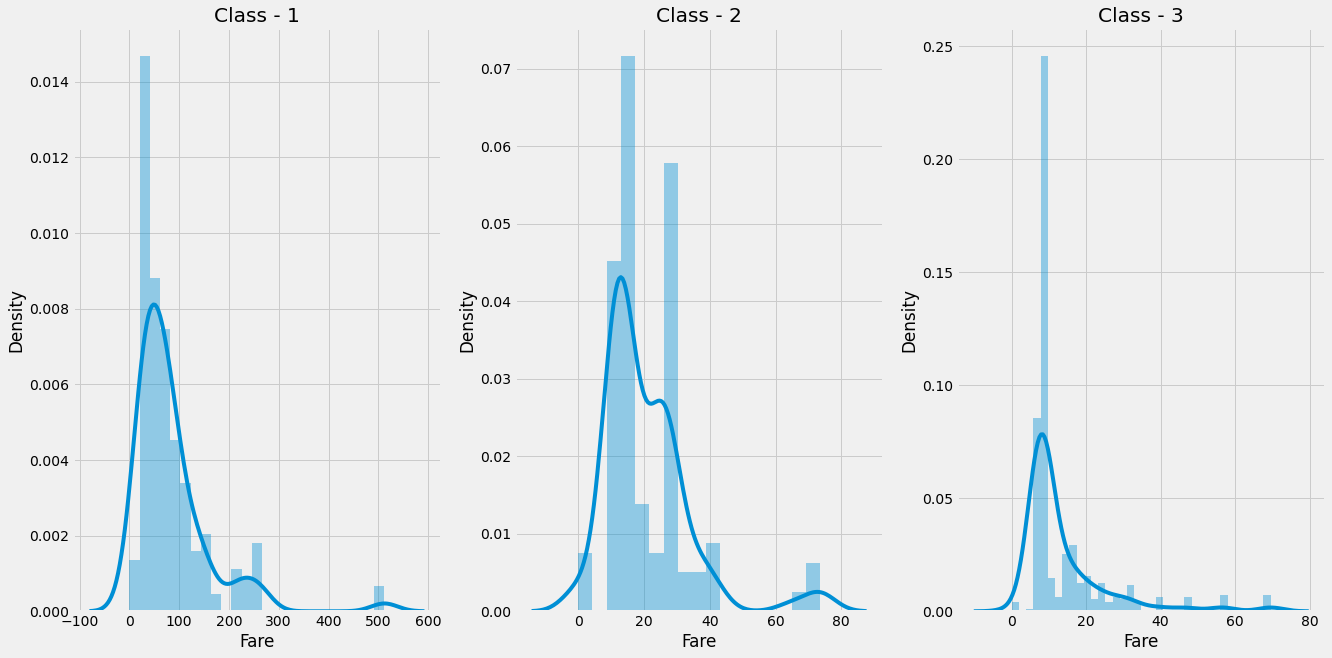

In [20]:
# 9. Fare - Continous variable

f, ax = plt.subplots(1,3,figsize = (20,10))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Class - 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Class - 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Class - 3')

Pclass - 1 has larger distribtion of Fare and it reduces as we move to lower class

10. Cabin - Cabin number

In [21]:
print('Null count', data['Cabin'].isnull().sum())
print('Distinct: ', data['Cabin'].nunique())
data['Ticket'].sample(10)

Null count 687
Distinct:  147


297       113781
389      SC 1748
617    A/5. 3336
205       347054
405        28664
1       PC 17599
110       110465
477         3460
257       110152
562       218629
Name: Ticket, dtype: object

Cabin has lot of null values, we will drop this feature

11. Embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton (Categorical)

Text(0.5, 1.0, 'Embarked')

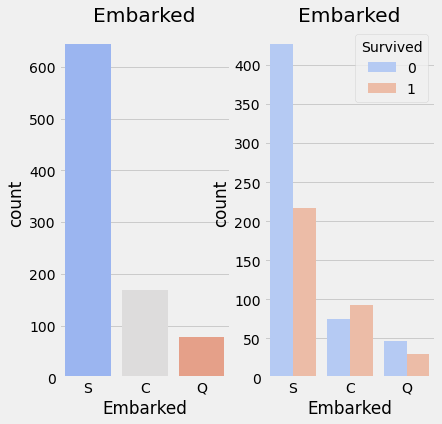

In [22]:
plt.subplot(121)
sns.countplot(data['Embarked'], palette = 'coolwarm')
plt.title('Embarked')

plt.subplot(122)
sns.countplot(data['Embarked'], hue = data['Survived'], palette = 'coolwarm')
plt.title('Embarked')

Text(0.5, 1.0, 'Survival Rate')

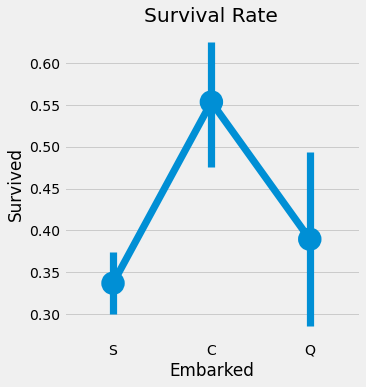

In [23]:
sns.factorplot('Embarked','Survived', data = data)
plt.title('Survival Rate')

Survival rate for C(Cherbourg) is max around 0.55 and lowest for S(Southampton) around 0.30

<AxesSubplot:xlabel='Embarked', ylabel='count'>

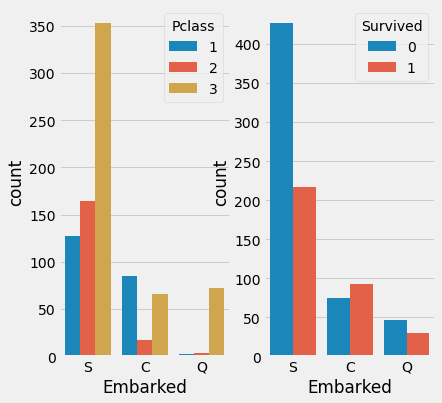

In [24]:
plt.subplot(121)
sns.countplot(x = data['Embarked'], hue = data['Pclass'])

plt.subplot(122)
sns.countplot(x = data['Embarked'], hue = data['Survived'])

1. Majority of people boarded from Port S, mostly belongs to class 3
2. Port Q has almost all passengers from class 3
3. Port C has best survival rate, as most of people boarded from C belongs to class 1

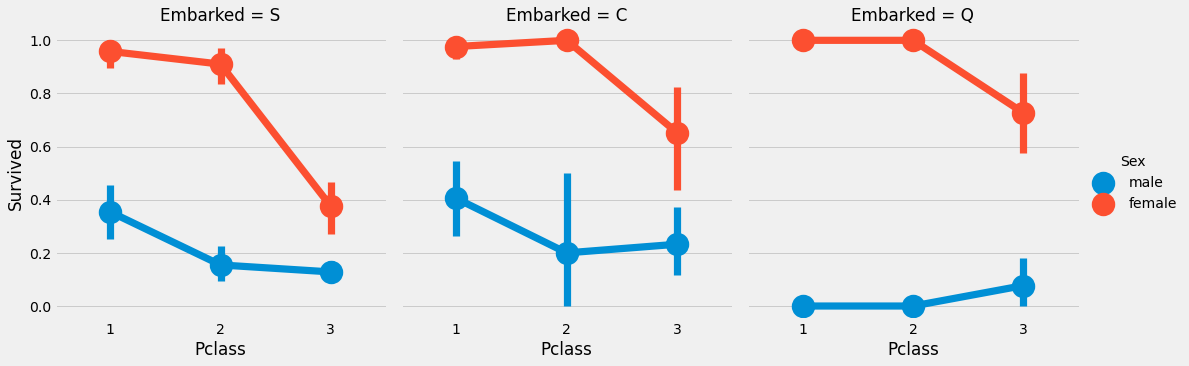

In [25]:
sns.factorplot('Pclass','Survived', hue = 'Sex', col = 'Embarked', data = data)

1. Survival Rate is high for females for both Class 1 & 2.
2. Survival rate for Port Q is worst as majority of people boarded are from class 3

# 2. Missing value Treatment

In [26]:
# Find the ratio of missing value columnwise
missing_count = data.isnull().sum()
missing_perc = data.isnull().mean() * 100
missing_df = pd.concat([missing_count, missing_perc], axis = 'columns')
missing_df.rename(columns = {0:'Count',1:'Percentage'}, inplace = True)
missing_df = (missing_df[missing_df['Count'] != 0.0]).sort_values(by = 'Count', ascending = False)
missing_df

,Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


1. Cabin - We will be not handling the Cabin Feature as it has lot of missing values and not having much value

 2. Age - We can replace the age value using the salutation from name columns

In [27]:
data['Name'].sample(10)

887          Graham, Miss. Margaret Edith
676         Sawyer, Mr. Frederick Charles
374            Palsson, Miss. Stina Viola
723               Hodges, Mr. Henry Price
785    Harmer, Mr. Abraham (David Lishin)
515          Walker, Mr. William Anderson
203                  Youseff, Mr. Gerious
592            Elsbury, Mr. William James
357             Funk, Miss. Annie Clemmer
263                 Harrison, Mr. William
Name: Name, dtype: object

In [28]:
data['Initials'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [29]:
data['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [30]:
data['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [31]:
data.loc[(data.Age.isnull()) & (data.Initials == 'Mr'), 'Age'] = data[data['Initials'] == 'Mr'].Age.mean()
data.loc[(data.Age.isnull()) & (data.Initials == 'Mrs'), 'Age'] = data[data['Initials'] == 'Mrs'].Age.mean()
data.loc[(data.Age.isnull()) & (data.Initials == 'Miss'), 'Age'] = data[data['Initials'] == 'Miss'].Age.mean()
data.loc[(data.Age.isnull()) & (data.Initials == 'Master'), 'Age'] = data[data['Initials'] == 'Master'].Age.mean()
data.loc[(data.Age.isnull()) & (data.Initials == 'Object'), 'Age'] = data[data['Initials'] == 'Object'].Age.mean()

In [32]:
data.Age.isnull().sum()

0

3. Embarked - As majority of travelers boarded from Port 'S', we place the missing value with 'S'

In [33]:
data['Embarked'].fillna('S', inplace = True)

<AxesSubplot:>

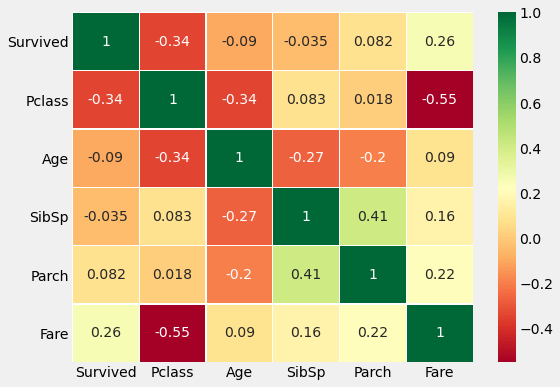

In [34]:
# Correlation
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(data.drop(['PassengerId'], axis = 'columns').corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)

The highest correlation is between SibSp & Parch 0.41

# 3. Feature Engineering 

Creating new feature Family Size which is summation of Parch & Siblings

In [35]:
data['Family_Size'] = data['Parch'] + data['SibSp']

In [36]:
# 1. Age - Converting Age to bin of 5
data['Age_range'] = 0
data.loc[data['Age'] <= 16, 'Age_range'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_range'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_range'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_range'] = 3
data.loc[(data['Age'] > 64), 'Age_range' ] = 4

In [37]:
data['Age_range'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [38]:
# 2. Fare - Converting Fare to bin
data['Fare_Range'] = pd.qcut(data['Fare'],4)

In [39]:
data.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [40]:
data['Fare_Cat'] = 0
data.loc[(data['Fare'] <= 7.91), 'Fare_Cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.5), 'Fare_Cat'] = 1
data.loc[(data['Fare'] > 14.5) & (data['Fare'] <= 31), 'Fare_Cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_Cat'] = 3

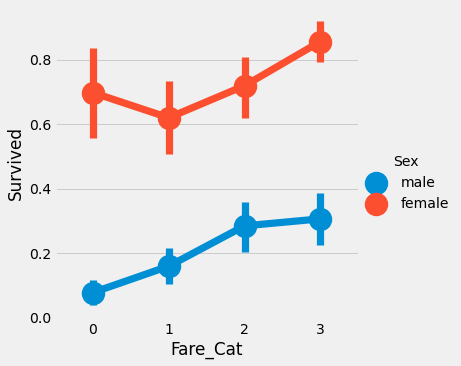

In [41]:
sns.factorplot('Fare_Cat','Survived', data = data, hue = 'Sex')

In [42]:
# Ordinal Encoding

sex_order = {'male' : 0, 'female' : 1}
embarked_order = {'S' : 0, 'C' : 1, 'Q' : 2}
initial_order = {'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Other' : 4}

In [43]:
data['Sex'] = data['Sex'].map(sex_order)
data['Embarked'] = data['Embarked'].map(embarked_order)
data['Initials'] = data['Initials'].map(initial_order)


In [44]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Family_Size,Age_range,Fare_Range,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1,2,"(31.0, 512.329]",3


In [45]:
# Dropping unnessary columns
data = data.drop(['PassengerId','Age','Fare','Fare_Range','Ticket','Name','Cabin'], axis = 'columns')

In [46]:
data.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initials,Family_Size,Age_range,Fare_Cat
0,0,3,0,1,0,0,0,1,1,0
1,1,1,1,1,0,1,1,1,2,3


# 4. Model Training

In [47]:
# Independent & Dependent Variable
X = data.drop(['Survived'], axis = 'columns')
y = data['Survived']

In [48]:
# Train/Test Split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
# 1. SVM - RBF

svm_rbf = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)
score_rbf = accuracy_score(y_test, svm_rbf_pred)
print('Score SVM - rbf : ', score_rbf)

Score SVM - rbf :  0.8171641791044776


In [50]:
# 2. SVM - Linear

svm_linear = SVC(kernel = 'linear', C = 1, gamma = 0.1)
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)
score_linear = accuracy_score(y_test, svm_linear_pred)
print('Score SVM - rbf : ', score_linear)

Score SVM - rbf :  0.7723880597014925


In [51]:
# 3. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model_pred = log_model.predict(X_test)
score_log = accuracy_score(y_test, log_model_pred)
print('Score SVM - rbf : ', score_log)

Score SVM - rbf :  0.8022388059701493


In [52]:
# 4. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
score_tree = accuracy_score(y_test, tree_pred)
print('Score Decision Tree : ', score_tree)

Score Decision Tree :  0.832089552238806


In [53]:
# 5. KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
score_knn = accuracy_score(y_test, knn_pred)
print('Score Decision Tree : ', score_knn)

Score Decision Tree :  0.8059701492537313


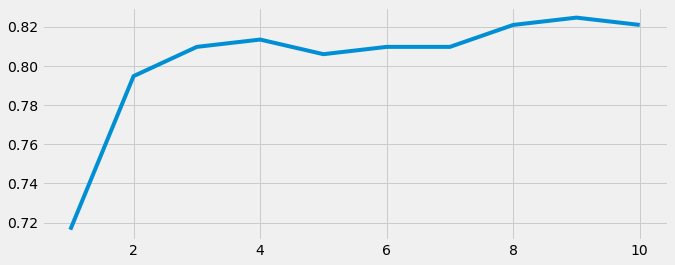

In [54]:
plt.rcParams['figure.figsize'] = (10,4)
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a =[]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    a.append(accuracy_score(y_test, pred))
    
plt.plot(x, a)    
    

In [55]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
score_knn = accuracy_score(y_test, knn_pred)
print('Score Decision Tree : ', score_knn)

Score Decision Tree :  0.8097014925373134


In [56]:
# 6. Gassian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
score_nb = accuracy_score(y_test, nb_pred)
print('Score Gaussian Naive Bayes : ', score_nb)

Score Gaussian Naive Bayes :  0.8059701492537313


In [57]:
# 7. Random Forest
rf_model = RandomForestClassifier(n_estimators = 500)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
score_rf = accuracy_score(y_test, rf_pred)
print('Score Random Forest : ', score_rf)

Score Random Forest :  0.8395522388059702


In [58]:
# Cross Validation
scores = []
std = []
accuracy = []
kfold = KFold(n_splits = 10)
classifiers = ['Logistic Regression','Naive Bayes', 'SVM RBF', 'SVM Linear', 'Decision Tree', 'KNN', 'Random Forest']
models = [LogisticRegression(),  
          GaussianNB(), 
          SVC(kernel = 'rbf', C = 1, gamma = 0.1), 
          SVC(kernel = 'linear', C = 1, gamma = 0.1),
          DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors = 6),
          RandomForestClassifier(n_estimators = 500) ]

for model in models: 
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    scores.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
model_results = pd.DataFrame({'Mean': scores, 'Std':std}, index = classifiers).sort_values(by = 'Mean', ascending = False)   
model_accuracy = pd.DataFrame(accuracy, index = classifiers)

In [59]:
model_results

,Mean,Std
SVM RBF,0.828290,0.034427
Random Forest,0.819351,0.036097
Decision Tree,0.817079,0.028746
KNN,0.810375,0.033901
Logistic Regression,0.794619,0.018749
Naive Bayes,0.790150,0.032773
SVM Linear,0.786729,0.039372


<AxesSubplot:>

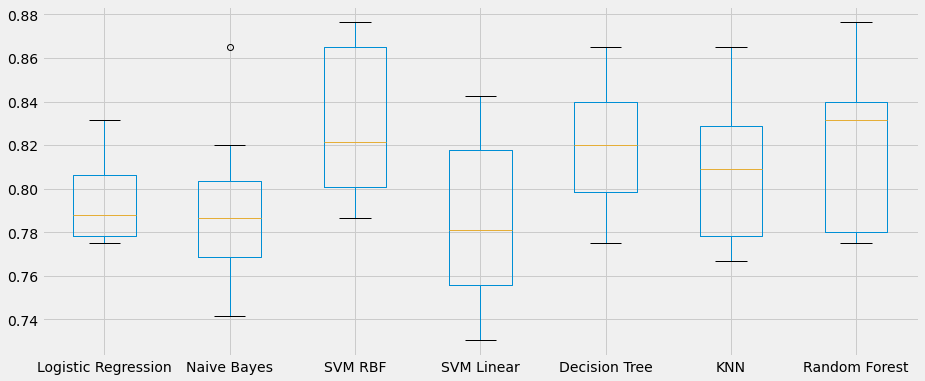

In [60]:
plt.rcParams['figure.figsize'] = (14,6)
model_accuracy.T.boxplot()

The accuracy score can be misleading for imbalance class so we can use Confusion Matrix 

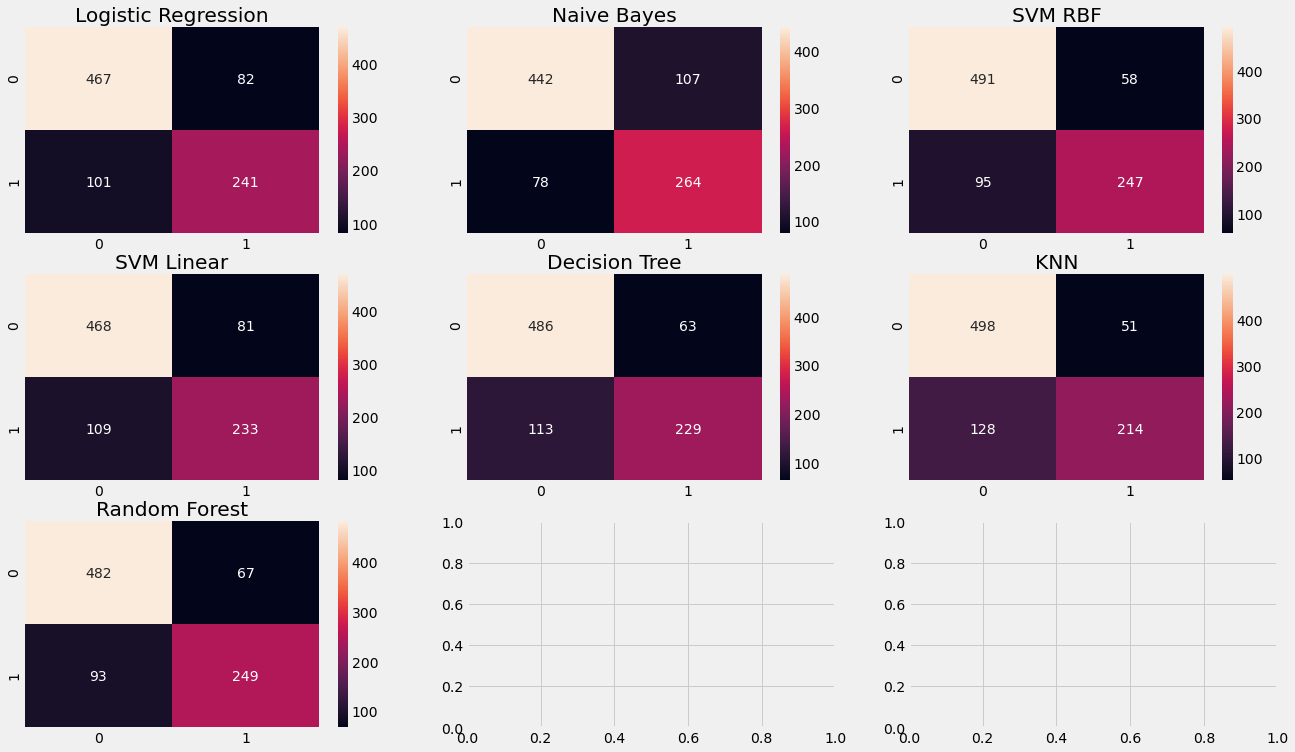

In [61]:
fig, ax = plt.subplots(3,3,figsize = (20,12))
index = 0
for row in range(0,3):
    for col in range(0,3):
        if index < 7:
            y_pred = cross_val_predict(models[index], X, y, cv = 10)
            sns.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = '2.0f', ax = ax[row][col])
            ax[row,col].set_title(classifiers[index])
            index = index + 1

By looking at the matrix we can say SVM rbf has better prediction for predicting dead, 
Naive Bayes has good peformance in predicting Survived


### Hyper Parameter Tunning

We will try to do parameter tunning for 2 best model Random Forest & SVM(rbf)

In [62]:
# SVM

C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['linear', 'rbf']
params = {'kernel': kernel, 'C' : C, 'gamma' : gamma}
model = SVC()
gd = GridSearchCV(estimator = model, param_grid = params, verbose = True)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8305065595380077
SVC(C=0.3, gamma=0.3)
{'C': 0.3, 'gamma': 0.3, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   11.3s finished


In [63]:
# Precision, Recall & F1 - Score
def show_metrics(y_test, y_pred):
    print('Precision Score : {:.3f}'.format(precision_score(y_test, y_pred)))
    print('Recall Score : {:.3f} '.format(recall_score(y_test, y_pred)))
    print('F1 Score : {:.3f}'.format(f1_score(y_test, y_pred)))  

In [101]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (4,4)
    sns.heatmap(cm, annot = True)

In [110]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr,label = 'ROC Curve', linewidth = 2)
    plt.plot([0,1], [0,1], 'k--', linewidth = 2)
    plt.title(' ROC Curve')

In [106]:
# # Precision / Recall Curve
def plot_precision_recall_curve(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, linewidth = 2)
    plt.fill_between(recall, precision, alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')

In [166]:
# Feature Importance Plot
def feature_importance_plot(feature_importances, features):
    df_features = pd.DataFrame({'Feature': features, 'Feature Importance' : feature_importances})
    df_features.sort_values(by = 'Feature Importance', ascending = False, inplace = True)
    plt.rcParams['figure.figsize'] = (20,10)
    sns.barplot(x = 'Feature Importance', y = 'Feature', data = df_features)

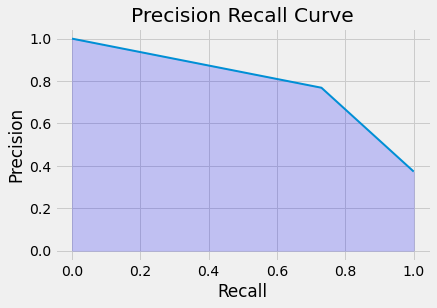

In [107]:
svm = SVC(C = 0.8, gamma = 0.1, kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
plot_precision_recall_curve(y_test, y_pred)


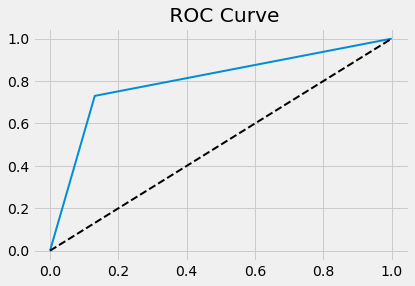

In [108]:
plot_roc_curve(y_test, y_pred)

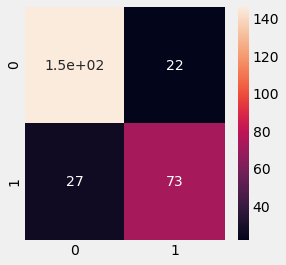

In [109]:
plot_confusion_matrix(y_test, y_pred)

In [172]:
# Random Forest

n_estimator = range(100, 1000, 100)
params = {'n_estimators' : n_estimator }
model = RandomForestClassifier()
gd = GridSearchCV(estimator = model, param_grid = params, verbose = True)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   24.0s finished


0.8181909484652564
RandomForestClassifier(n_estimators=500)
{'n_estimators': 500}


In [173]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.832089552238806


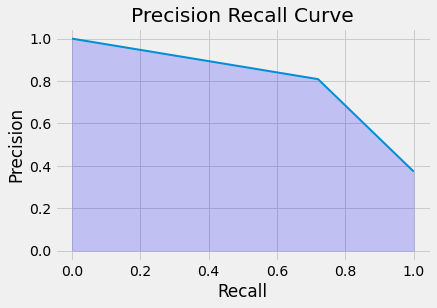

In [174]:
plot_precision_recall_curve(y_test, y_pred)

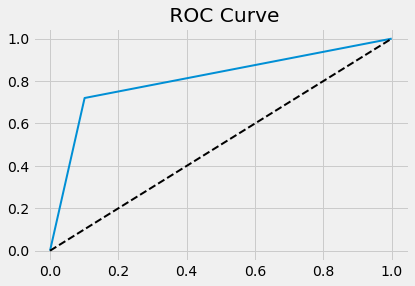

In [177]:
plot_roc_curve(y_test, y_pred)

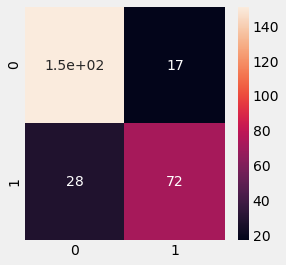

In [178]:
plot_confusion_matrix(y_test, y_pred)

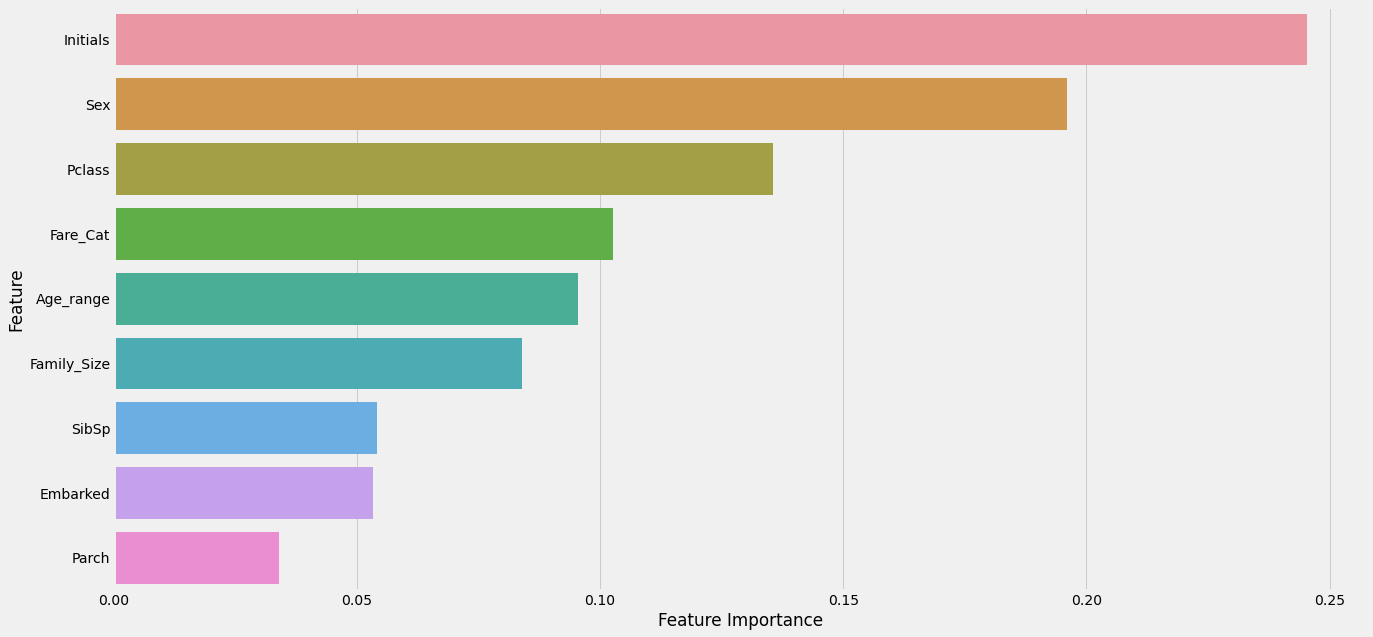

In [179]:
feature_importance_plot(gd.best_estimator_.feature_importances_, X_train.columns)

* Best score for Rbf-SVM is 83.0 with C = 0.8, gamma = 0.1 
* Best score for Random Forest is 81.8 with n_estimators = 700